# Handling missing integer values 01

In [ ]:
## Numerical data

    1. univariate imputation - to fill particular one column , use that olny that column data
    2. multivariate imputation - if we take help of multiple rows values
        2.1 knn imputer
        2.2 iterative imputer

In [ ]:
1. mean / mediaum - replace with mean/medium values
2. arbitary values - replace with any constant value
3. random values - replace with random value

## 1. Mean / Medium Imputation 

In [ ]:
1. mean / medium imputation

mean - if distribution is normal then use it

medium - if your distribution is skewed then use median

advantage

    - easy to implement

disadvantage
    - distribution changes
    - some outliers may come
    - variables covarience changed
    - if missing values are more than 5% then not efective


when to use
    - when data is missing at random
    - if missing data are leass than 5 %



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:

df = pd.read_csv('titanic_toy.csv')

In [4]:

df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:

df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:

X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:

X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [12]:

X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [13]:

X_train.sample(5)

Age    Fare  Family  Age_median   Age_mean  Fare_median  Fare_mean
46    NaN  15.500       1       28.75  29.785904       15.500     15.500
168   NaN  25.925       0       28.75  29.785904       25.925     25.925
241   NaN  15.500       1       28.75  29.785904       15.500     15.500
766   NaN  39.600       0       28.75  29.785904       39.600     39.600
394  24.0  16.700       2       24.00  24.000000       16.700     16.700

In [14]:

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


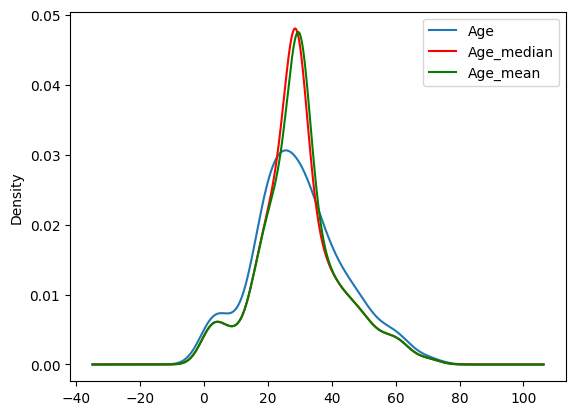

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

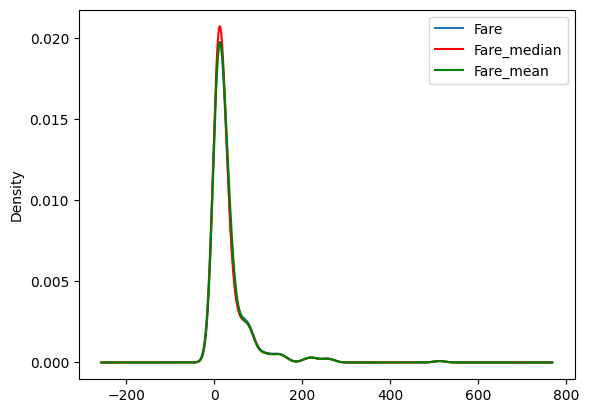

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:

X_train.cov()

Age         Fare     Family  Age_median    Age_mean  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   57.957599   55.603719   
Family        -6.498901    17.258917   2.735252   -5.112563   -5.146106   
Age_median   204.349513    57.957599  -5.112563  161.989566  161.812625   
Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
Fare_median   64.858859  2448.197914  16.476305   53.553455   51.358000   
Fare_mean     66.665205  2448.197914  16.385048   55.023037   52.788341   

             Fare_median    Fare_mean  
Age            64.858859    66.665205  
Fare         2448.197914  2448.197914  
Family         16.476305    16.385048  
Age_median     53.553455    55.023037  
Age_mean       51.358000    52.788341  
Fare_median  2340.091022  2324.238526  
Fare_mean    2324.238526  2324.238526

In [18]:

X_train.corr()

Age      Fare    Family  Age_median  Age_mean  Fare_median  \
Age          1.000000  0.092644 -0.299113    1.000000  1.000000     0.087356   
Fare         0.092644  1.000000  0.208268    0.091757  0.088069     1.000000   
Family      -0.299113  0.208268  1.000000   -0.242883 -0.244610     0.205942   
Age_median   1.000000  0.091757 -0.242883    1.000000  0.999454     0.086982   
Age_mean     1.000000  0.088069 -0.244610    0.999454  1.000000     0.083461   
Fare_median  0.087356  1.000000  0.205942    0.086982  0.083461     1.000000   
Fare_mean    0.090156  1.000000  0.205499    0.089673  0.086078     0.996607   

             Fare_mean  
Age           0.090156  
Fare          1.000000  
Family        0.205499  
Age_median    0.089673  
Age_mean      0.086078  
Fare_median   0.996607  
Fare_mean     1.000000

<Axes: >

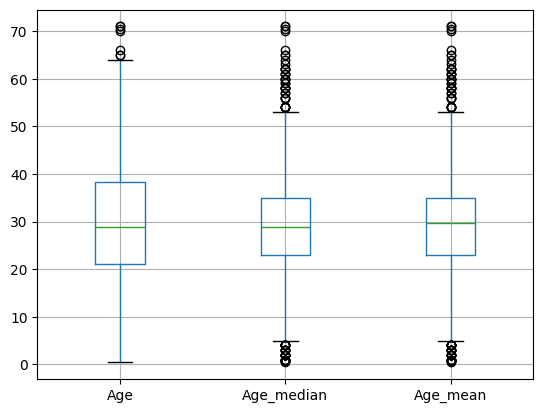

In [19]:

X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

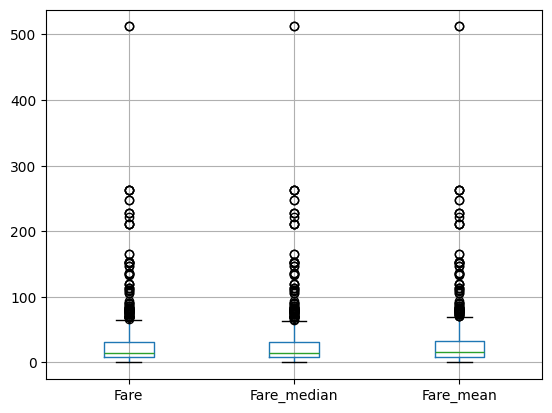

In [20]:

X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

## Using Sklearn

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [23]:

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [24]:

trf.fit(X_train)

C:\Users\AVADHESH KU. SHAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [25]:

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [26]:

trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [27]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [28]:

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))

## 2. Arbitary Imputation - 

In [ ]:
catogorial data

    - "missing" (ML can indetify that here is missing)

Numerical data

    - "-1" (creating diff beween....)


use
    - when data is not missing at random (missing values in chungs)


In [ ]:
## Advantage

    - easy to implement

## Disadvantage
    - corelation changes with other column
    - varience changed

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [30]:

df = pd.read_csv('titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [31]:

df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [32]:

X = df.drop(columns=['Survived'])
y = df['Survived']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


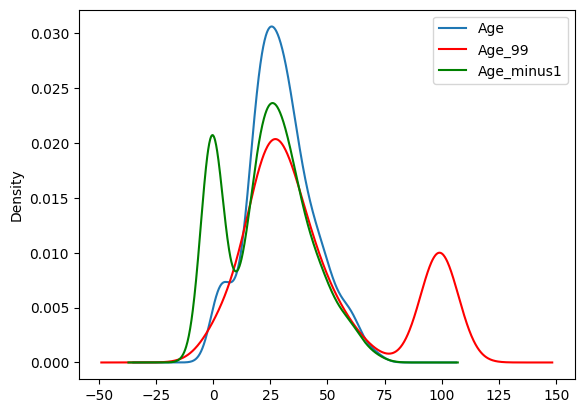

In [39]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

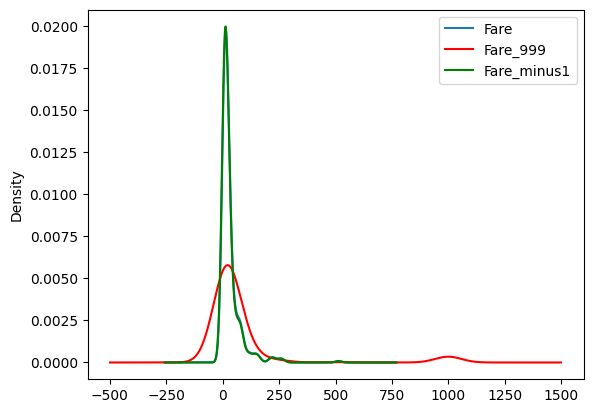

In [40]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:

X_train.cov()

Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
Fare_999     162.793430  2448.197914  11.528625 -159.931663  257.379887   
Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   

                 Fare_999  Fare_minus1  
Age            162.793430    63.321188  
Fare          2448.197914  2448.197914  
Family          11.528625    16.553989  
Age_99        -159.931663   -94.317400  
Age_minus1     257.379887   114.394141  
Fare_999     47219.202652   762.474982  
Fare_minus1    762.474982  2378.567678

In [42]:

X_train.corr()

Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000  0.051179   
Fare         0.092644  1.000000  0.208268 -0.066273    0.142022  1.000000   
Family      -0.299113  0.208268  1.000000 -0.144787   -0.140668  0.032079   
Age_99       1.000000 -0.066273 -0.144787  1.000000   -0.344476 -0.023857   
Age_minus1   1.000000  0.142022 -0.140668 -0.344476    1.000000  0.066411   
Fare_999     0.051179  1.000000  0.032079 -0.023857    0.066411  1.000000   
Fare_minus1  0.084585  1.000000  0.205233 -0.062687    0.131514  0.071946   

             Fare_minus1  
Age             0.084585  
Fare            1.000000  
Family          0.205233  
Age_99         -0.062687  
Age_minus1      0.131514  
Fare_999        0.071946  
Fare_minus1     1.000000

##  Using Sklearn

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [45]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [46]:

trf.fit(X_train)

C:\Users\AVADHESH KU. SHAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [47]:

trf.named_transformers_['imputer1'].statistics_

array([99.])

In [50]:

trf.named_transformers_['imputer2'].statistics_

array([999.])

In [51]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [52]:

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))